# Logistic Regression

Logistic Regression is a statistical model used for binary classification problems. It estimates the probability that an instance belongs to a particular class and is the building block of some neural nets.

**Typical Use Cases:**
- Predicting whether an email is spam or not.
- Classifying customer churn (churn vs. stay).
- Medical diagnosis (disease vs. no disease).


## Pros, Cons, and When to Use

**Pros:**
- Easy to implement and interpret.
- Fast to train.
- Works well for linearly separable classes.

**Cons:**
- Assumes linearity between independent variables and log-odds.
- Struggles with multicollinearity.
- Can underperform with highly complex or non-linear data.

**When to Use:**
- When you need a baseline binary classifier.
- When interpretability matters.
- When the relationship between features and the target is approximately linear.

In [1]:
# For visualisations
from Visualisations import *


## Motivation

Consider the linear regression model  

$$ Y = x^{\top}\beta + \epsilon$$

where the expected value of $Y$ given $x$ written as $E[Y|x]$ is equal to $x^{\top}\beta$.

This makes sense for numerical values but what about categorical?

---


## Encoding Categories
Assume the output $Y$ has only two categories i.e True/False, Red/Blue, Heads/Tails, etc. 

$Y \in \{c_0, c_1\}$

We can encode these categories in $c_0 := 0$ and $c_1 := 1$ so that $Y \in \{0, 1\}$

$$E[Y | x] = 0 \cdot P(Y = 0 | x) + 1 \cdot P(Y = 1 | x) = P(Y = 1 |x) \overset{\text{denote}}{=} \pi$$  

So for a given value $x \in \mathbb{R}^{p}$ we would like to predict if $Y$ will take the value $0$ or $1$ (i.e. $c_0, c_1$). In other words we would like to **classify** the prediction.  

For a given $x \in \mathbb{R}^{p}$, if we estimate $\pi = E[Y|x] = P(Y - 1|x)$ to be high then our prediction $\hat{y} = 1$ otherwise $\hat{y} = 0$.  

So how do we estimate $\pi = E[Y|x] = P(Y = 1|x)$?

---

## Sigmoid Function

The natural log to the rescue!

Note that if we take the natural log of the **odds ratio** of $\pi$ and regress on $x$ we get  

$$\ln \dfrac{\pi}{1 - \pi} = x^{\top}\beta$$  

Solving for $\pi$ gives 

$$P(y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}} = \dfrac{1}{1 + e^{-x^{\top}\beta}}$$

The function $F(z) = \dfrac{e^{z}}{1 + e^{z}} = \dfrac{1}{1 + e^{-z}}$ is called the **sigmoid** function denoted by $\sigma (z)$  

The function $\pi \mapsto \ln \dfrac{\pi}{1 - \pi}$ is called **logit** or the logistic unit function.

Classifying a binary output $Y$ using the model $P(Y = 1|x) = \pi = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$ is called **Logistic Regression**.  

---

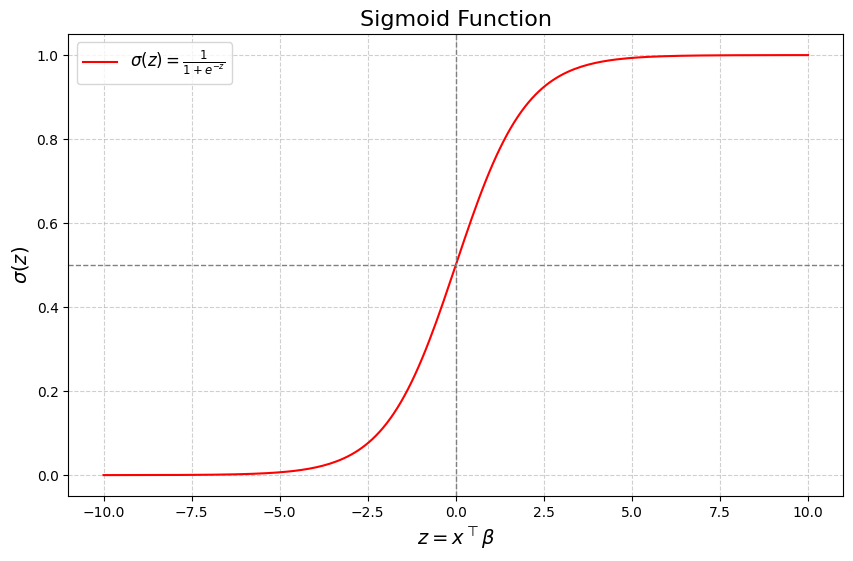

In [2]:
# Graph of sigmoid function
sigmoid_plot()

## Parameter Estimation

We want to estimate ${\pi}$ 

$$\hat{\pi} = \dfrac{e^{x^{\top} \hat{\beta}}}{1 + e^{x^{\top}\hat{\beta}}}$$  

but how do we estimate the parameter vector $\hat{\beta}$?

We use the maximum likelihood estimate which minimises the log-likelihood function so $\hat{\beta} = \hat{\beta}_{MLE}$


$\pi = P(Y = 1 |x, \beta) = F(x^{\top}\beta) = \dfrac{e^{x^{\top} \beta}}{1 + e^{x^{\top}\beta}}$

$$
P(Y = y \mid x, \beta) =
\begin{cases}
\pi & \text{,} y = 1 \\
1 - \pi & \text{,} y = 0
\end{cases} = \pi^{y} (1 - \pi)^{1-y} = F(x^{\top} \beta)^{y} (1 - F(x^{\top} \beta))^{1 - y}
$$

Recalling the regressor matrix $X = \begin{bmatrix} X_{1\rightarrow} \\ \vdots \\ X_{i\rightarrow} \\ \vdots \\ X_{n\rightarrow} \end{bmatrix} = \begin{bmatrix} x_{1}^{\top} \\ \vdots \\ x_{i}^{\top}  \\ \vdots \\ x_{n}^{\top}  \end{bmatrix}$ where $x_{i}^{\top} = [1, x_{i2}, x_{i3}, \dots, x_{ip}]$ are the values of all predictors in the *i*-th observation.  

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities

---

## Log Likelihood

The likelihood function becomes

$$
L(\beta) = \prod_{i=1}^{n} \left[ F(X_i^T \beta) \right]^{y_i} \left[ 1 - F(X_i^T \beta) \right]^{1 - y_i}
$$

Where:

$$
p_{i} = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}
$$

$p_{i}$ is the predicted probability of the *i*-th observation belonging to the positive class  

Using the logarithmic properties  

$$\ln(ab) = \ln(a) + \ln(b)$$  

and 

$$\ln(a^{b}) = b \ln(a)$$ 

We can rewrite the likelihood function as the **log-likelihood function**


$$
\ln L(\beta) = \sum_{i=1}^{n} \left[ y_i \ln F(X_i^T \beta) + (1 - y_i) \ln (1 - F(X_i^T \beta)) \right] = \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i)) \right]
$$


The goal is to find the parameters $\beta$ that maximise this log-likelihood.

---

For the logistic setting the loss function is:

$$
\ell(\beta) = -\ln L(\beta)
$$

Maximum likelihood estimator (MLE):

$$
\hat{\beta}_{MLE} = \arg \max_{\beta} L(\beta)
= \arg \max_{\beta} \ln L(\beta)
= \arg \min_{\beta} \left(-\ln L(\beta)\right)
= \arg \min_{\beta} \ell(\beta)
$$

**Convexity and Global Minimum**  

It can be shown that the loss function $ \ell(\beta) = -\ln L(\beta)$ is a **convex function** in $\beta$, since $\ln L(\beta)$ is concave.  

This convexity guarantees a **unique global minimum** for the optimization problem.  

---


## Logistic Regression Loss Function and Gradient

The **negative log-likelihood (loss function)** for logistic regression is:

$$
\ell(\beta) = - \sum_{i=1}^{n} \left[ y_i \ln p_i + (1 - y_i) \ln (1 - p_i) \right]
$$

Where:

- $n$ = number of observations  
- $p_i$ = predicted probability for observation $i$  
- $y_i$ = actual binary outcome (0 or 1) for observation $i$  
- $p_i = F(X_i^T \beta) = \frac{1}{1 + e^{-X_i^T \beta}}$

---

## Gradient of the Loss Function

Taking the derivative with respect to $\beta$ gives the gradient:

$$
\nabla_\beta \ell(\beta) = \sum_{i=1}^{n} (p_i - y_i) X_i
$$

Or more compactly in matrix notation:

$$
\nabla_\beta \ell(\beta) = X^T (p - y)
$$

---

## Notation:

- $X$ is an $n \times k$ matrix:  
  - $n$ = number of observations (rows)  
  - $k$ = number of predictors (columns, including an intercept if applicable)
- $p$ is an $n \times 1$ vector of predicted probabilities  
- $y$ is an $n \times 1$ vector of actual labels (0 or 1)

---

## Why It Matters:

- The gradient $\nabla_\beta \ell(\beta)$ shows how to adjust the model parameters $\beta$ to reduce the loss.
- It's used in optimization algorithms like:
  - **Gradient Descent**:
    $$
    \beta^{(t+1)} = \beta^{(t)} - \alpha \nabla_\beta \ell(\beta^{(t)})
    $$
  - **Newton-Raphson (or Iteratively Reweighted Least Squares for logistic regression)** — a second-order method using the Hessian for faster convergence.
- Minimizing this loss function finds the **maximum likelihood estimate (MLE)** of $\beta$.

---


## Hessian of the Loss Function

The **Hessian matrix** is the matrix of second derivatives of the loss function with respect to the parameters $\beta$.

For logistic regression, the Hessian is:

$$
H(\beta) = X^T W X
$$

Where:

- $W$ is an $n \times n$ diagonal matrix with entries:
  $$
  w_i = p_i (1 - p_i)
  $$

---

## Newton-Raphson (Iteratively Reweighted Least Squares) Update

Using both the gradient and the Hessian, the **Newton-Raphson update step** for $\beta$ is:

$$
\beta^{(t+1)} = \beta^{(t)} - H^{-1}(\beta^{(t)}) \nabla_\beta \ell(\beta^{(t)})
$$

In matrix form:

$$
\beta^{(t+1)} = \beta^{(t)} + (X^T W X)^{-1} X^T (y - p)
$$

---

## Why This Matters:

- The Hessian captures the **curvature** of the loss function.  
- Using it with the Newton-Raphson method allows for **faster, quadratic convergence** compared to first-order methods like gradient descent.  
- Especially useful in logistic regression where the log-likelihood is concave and has a unique maximum.  

Newton-Raphson is the basis for many statistical modeling tools (like `statsmodels`' `Logit` or `GLM` in Python) that solve logistic regression models via maximum likelihood.

---


## Summary

The logistic regression model uses the **sigmoid function** to map predicted values to probabilities:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Where:
- $ \beta_0 $ is the intercept.
- $ \beta_i $ are the model coefficients.
- $ X_i $ are the feature values.

The loss function used is the **log loss** (binary cross-entropy):

$$
L = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(p_i) + (1-y_i) \log(1-p_i) \right]
$$


## Data Preprocessing

**When to use Standardization or Normalization:**

- Logistic Regression is sensitive to the scale of features.
- Use **Standardization** (zero mean, unit variance) if features have different units or scales.


## Predicting Breast Cancer Example

**Background**

The data was collected to identify whether a tumor biopsy was malignant or benign. A malignant tumor requires medical intervention.  

**Variables**
Ten real-valued features are computed for each cell nucleus:

a) radius8 (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

k) **Diagnosis** (M = malignant, B = benign)

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load breast cancer data
data = load_breast_cancer()

# Create data frame of predictive features
X = pd.DataFrame(data.data, columns=data.feature_names)

# Create series (one-dimensional array) for the target data we are trying to predict
y = pd.Series(data.target)

In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# In this step we check how many malignant and benign diagnoses are in the target variable, malignant is coded as "1", benign is coded as "0"

diagnosis_categories  = list(y.value_counts())
print('This data has {} malignant and {} benign diagnoses.'.format(diagnosis_categories[1],diagnosis_categories[0]))

This data has 212 malignant and 357 benign diagnoses.


The data is unbalanced and we will address this later with Stratified K-Fold cross-validation

## Split the data into training and test sets

Important to split the data prior to standardizing it as it prevents 'data leakage' or information learned during scaling the whole data set from being indirectly introduced to the model.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the data

There are 30 different feature columns with different units of measurement so lets standardize them.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Compute scaling parameters (mean and standard deviation) on the training data then transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Then transform test data using the scaler fitted on training data
X_test_scaled = scaler.transform(X_test)

## Fit The Model on Training Data

In [8]:
from sklearn.linear_model import LogisticRegression

# Define the model and parameters used
model = LogisticRegression(max_iter= 5000, random_state= 42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=5000, random_state=42)

## Predict Test Data Using the Training Model

In [9]:
y_pred = model.predict(X_test_scaled)

y_prob = model.predict_proba(X_test_scaled)[:, 1]

## Evaluation Metrics


**Accuracy**: Proportion of the data correctly predicted  

$$\text{Accurary} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

**Precision**: Positive Predictive Value (PPV)  

$$PPV = \dfrac{TP}{TP + FP}$$

**Sensitivity or Recall**: The True Positive Rate (TPR)

$$TPR = \dfrac{TP}{P} = \dfrac{TP}{TP + FN} = 1 - FNR$$

**F1 Score**: Provides a balance between precision and recall

$$\text{F1 Score} = 2 * \dfrac{\text{(Precision * Recall)}}{\text{(Precision + Recall)}}$$
 
**ROC-AUC**: Receiver Operator Characteristics - Area Under the Curve  

ROC plots the true positive rate (TPR) vs. the false positive rate (FPR) = 1 - Specificity  

Area Under the Curve is simply the area under the curve generated by plotting the ROC

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:,1]))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791
ROC-AUC: 0.99737962659679

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Visualise classification performance on out of sample test data

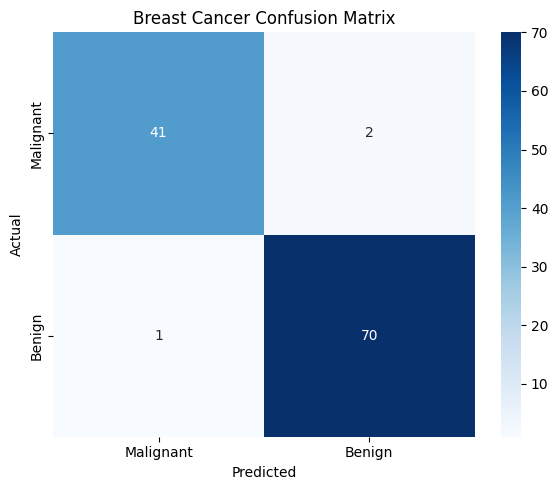

In [11]:
plot_confusion_matrix(y_test, y_pred, class_names=data.target_names, title = 'Breast Cancer Confusion Matrix')

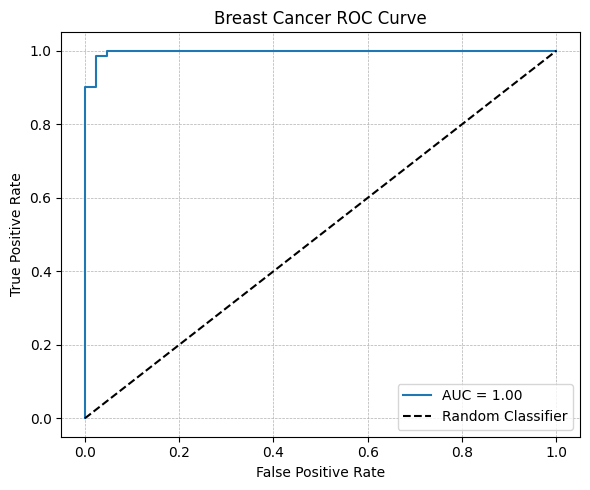

ROC AUC Score: 0.9974


In [12]:
plot_roc_curve(y_test, y_prob, title = 'Breast Cancer ROC Curve')

In [13]:
# 🔍 Check feature coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
print("\nLogistic Regression Coefficients (sorted by impact):")
print(coefficients.sort_values(ascending=False))


Logistic Regression Coefficients (sorted by impact):
compactness error          0.682491
fractal dimension error    0.616230
mean compactness           0.540164
symmetry error             0.500425
mean symmetry              0.236119
texture error              0.188877
concavity error            0.175275
mean fractal dimension     0.075921
worst compactness          0.016110
mean smoothness           -0.071667
worst fractal dimension   -0.157414
concave points error      -0.311300
smoothness error          -0.313307
mean texture              -0.387326
mean perimeter            -0.393432
mean radius               -0.431904
mean area                 -0.465210
worst smoothness          -0.544170
worst perimeter           -0.589453
perimeter error           -0.610583
worst concave points      -0.778217
mean concavity            -0.801458
worst area                -0.841846
worst radius              -0.879840
area error                -0.907186
worst concavity           -0.943053
mean conca

## Cross-Validation

Use k-Fold Cross-Validation to validate model performance.

No split is needed for CV, but I like to hold out a portion of the data that is not tuned to test tuned model on out of sample data.

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

# No split needed for CV itself unless you're holding out a final test set
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# 5-fold cross-validation with accuracy as scoring metric
scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')

print("Accuracy scores on each fold:", scores)
print("Mean accuracy: {:.3f}".format(scores.mean()))

Accuracy scores on each fold: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Mean accuracy: 0.981


In [15]:
from sklearn.model_selection import cross_validate

# Adding multiple scoring metrics to the cross validation results
cv_results = cross_validate(pipe, X, y, cv=5, scoring=['accuracy', 'roc_auc'])

print("Mean Accuracy:", np.mean(cv_results['test_accuracy']))
print("Mean ROC AUC:", np.mean(cv_results['test_roc_auc']))

Mean Accuracy: 0.9806862288464524
Mean ROC AUC: 0.9951873601644319


### Unbalanced data

Use StratifiedKFold for balanced class splits in each fold
This is crucial for imbalanced data — and breast cancer is slightly imbalanced (around 62% benign / 38% malignant)

In [16]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe, X, y, cv=cv, scoring='accuracy')
print("StratifiedKFold CV accuracy:", scores.mean())

StratifiedKFold CV accuracy: 0.9736686849868033


## Logistic Regression with Regularization

In logistic regression, we used $\ell (\beta) = -\ln L (\beta)$ or *cross-entropy* to measure in-sample goodness of fit and sought to maximize the **log-likelihood** (or equivalently minimize the **negative log-likelihood**) to estimate $\hat{\boldsymbol{\beta}}^{\top} = [\beta_0, \beta_1, \dots, \beta_p]$.

The **regularized objective function** penalizes large values of the coefficients to control overfitting.

---

### Ridge $ (\ell_{2})$ Regularization  

We minimize:

$$
\mathcal{L} (\boldsymbol{\beta}, \lambda) = -\ln L(\beta_0, \beta_1, \dots, \beta_p) + \lambda \sum_{j=1}^p \beta_j^2
$$

**Where:**
- $L(\boldsymbol{\beta})$ is the likelihood of the data given the model parameters  
- $\lambda$ is the regularization strength (higher $\lambda$ → more shrinkage)  
- $\sum_{j=1}^p \beta_j^2$ is the **L2 penalty** (squared magnitudes of the coefficients)

This discourages large coefficient values but does **not set them to zero**.

---

### Lasso $ (\ell_{1})$ Regularization  

We minimize:

$$
\mathcal{L} (\boldsymbol{\beta}, \lambda) = -\ln L (\beta_0, \beta_1, \dots, \beta_p) + \lambda \sum_{j=1}^p |\beta_j|
$$

**Where:**
- $\sum_{j=1}^p |\beta_j|$ is the **L1 penalty** (absolute values of the coefficients)

This tends to shrink some coefficients exactly to zero, effectively doing **feature selection**.

---



## Regularization Summary


When there are many features that are moderately correlated  

- **Ridge** $(\ell_2)$  Shrinks coefficients, reduces multicollinearity with a penalty term $\lambda \sum \beta_j^2$   

When we want to remove or zero out less useful variables  

- **Lasso** $(\ell_1)$  Shrinks some coefficients to zero, does feature selection with a penalty term  $\lambda \sum$  $| \beta_{j}|$ 


## Ridge Model $(\ell_2)$

In [17]:
# Ridge Logistic Regression
ridge_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
ridge_model.fit(X_train_scaled, y_train)

# Predict
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_prob_ridge = ridge_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Ridge ROC AUC:", roc_auc_score(y_test, y_prob_ridge))

Ridge Accuracy: 0.9736842105263158
Ridge ROC AUC: 0.99737962659679


## Lasso Model $(\ell_1)$

In [18]:
# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_prob_lasso = lasso_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Lasso Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Lasso ROC AUC:", roc_auc_score(y_test, y_prob_lasso))

Lasso Accuracy: 0.9736842105263158
Lasso ROC AUC: 0.9967245332459876


## Evaluation of Regularisation Models

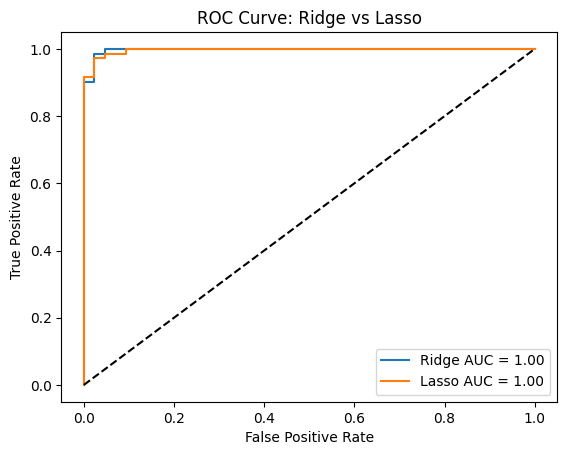

In [19]:
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_prob_ridge)
fpr_lasso, tpr_lasso, _ = roc_curve(y_test, y_prob_lasso)

plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge AUC = {roc_auc_score(y_test, y_prob_ridge):.2f}')
plt.plot(fpr_lasso, tpr_lasso, label=f'Lasso AUC = {roc_auc_score(y_test, y_prob_lasso):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Ridge vs Lasso")
plt.legend()
plt.show()


## Cross Validated Results

In [20]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with CV for Ridge (L2)
ridge_cv_model = LogisticRegressionCV(Cs=10, penalty='l2', solver='liblinear', cv=5)
ridge_cv_model.fit(X_train_scaled, y_train)
print("Best C for Ridge:", ridge_cv_model.C_[0])

# Logistic Regression with CV for Lasso (L1)
lasso_cv_model = LogisticRegressionCV(Cs=10, penalty='l1', solver='liblinear', cv=5)
lasso_cv_model.fit(X_train_scaled, y_train)
print("Best C for Lasso:", lasso_cv_model.C_[0])


Best C for Ridge: 0.3593813663804626
Best C for Lasso: 0.3593813663804626


## Hyperparameter Tuning

Key hyperparameters:
- `C`: Regularization strength (inverse of $ \lambda $).
- `penalty`: Regularization type (`l1`, `l2`, `elasticnet`).
- `solver`: Optimization algorithm.

Use `GridSearchCV` to find the best combination.

### Parameter Grid

In [21]:
# For Ridge (L2) and Lasso (L1)
param_grid = {
    'C': np.logspace(-4, 4, 20),   # Test C from 1e-4 to 1e4
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Only solver supporting both L1 and L2 penalties
}

In [22]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

# 5-fold cross-validation grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='roc_auc', verbose=1)

### Hyperparameters for the top model

In [23]:
print("Best parameters found:", grid_search.best_params_)
print("Best CV ROC AUC Score:", grid_search.best_score_)

Best parameters found: {'C': np.float64(0.08858667904100823), 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC AUC Score: 0.9938067555020689


### Use best model to predict on test data

In [24]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))


Test Accuracy: 0.9912280701754386
Test ROC AUC: 0.998689813298395


### View all results of grid search

In [25]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df[['param_C', 'param_penalty', 'mean_test_score']]
print(results_df.sort_values(by='mean_test_score', ascending=False).head())


     param_C param_penalty  mean_test_score
15  0.088587            l2         0.993807
17  0.233572            l2         0.993394
19  0.615848            l2         0.993189
13  0.033598            l2         0.993185
21  1.623777            l2         0.992878


### Deviance

Behaves like RSS in linear regression (smaller deviance = better fit)

In [26]:
# Predicted probabilities
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

# Log-likelihood
log_likelihood = np.sum(y_test * np.log(y_prob) + (1 - y_test) * np.log(1 - y_prob))

# Deviance
deviance = -2 * log_likelihood

print(f"Model Deviance: {deviance:.4f}")


Model Deviance: 18.9387


### Null Deviance

How well a model with no predictors fits the data (intercept only)

In [27]:
# Intercept-only model
intercept_only = LogisticRegression(fit_intercept=True, penalty=None, solver='lbfgs')
intercept_only.fit(np.zeros((len(y_train), 1)), y_train)

# Predicted probabilities
y_prob_null = intercept_only.predict_proba(np.zeros((len(y_test), 1)))[:, 1]

# Log-likelihood for null model
log_likelihood_null = np.sum(y_test * np.log(y_prob_null) + (1 - y_test) * np.log(1 - y_prob_null))

# Null Deviance
null_deviance = -2 * log_likelihood_null

print(f"Null Deviance: {null_deviance:.4f}")

Null Deviance: 151.1057


### McFadden's Pseudo-$R^2$

$R^{2}_{\text{McFadden}} = 1 - \dfrac{D_{\text{model}}}{D_{\text{null}}}$

In [28]:
R2_mcfadden = 1 - (deviance / null_deviance)
print(f"McFadden's pseudo-R^2: {R2_mcfadden:.4f}")

McFadden's pseudo-R^2: 0.8747


## References


- Prof. Rob McCulloch’s lecture notes (http://www.rob-mcculloch.org/)
- An Introduction to Statistical Learning with Applications in R (ISLR); by James, Witten, Hastie, Tibshirani
- "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" by Aurélien Géron
- [scikit-learn LogisticRegression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)